In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In this homework, we will use the Car price dataset like last week. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll work with the `MSRP` variable, and we'll transform it to a classification task. 

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`
* `MSRP`

In [3]:
df = pd.read_csv("car_price_data.csv")

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
columns = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 
           'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']

In [6]:
df = df[columns]

### Data preparation

* Keep only the columns above
* Lowercase the column names and replace spaces with underscores
* Fill the missing values with 0 
* Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable `above_average`

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [7]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [12]:
for col in categorical:
    df[col] = df[col].str.replace(' ', '_').str.lower()

In [13]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [14]:
df = df.fillna(0)

In [15]:
mean_price = df.msrp.mean()
mean_price

40594.737032063116

In [16]:
df['above_average'] = (df['msrp'] > mean_price).astype(int)

In [18]:
# df[['msrp', 'above_average']]

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [20]:
df_train, df_val = train_test_split(df, test_size=0.25, random_state=1)

In [21]:
df_full_train.shape, df_train.shape, df_val.shape, df_test.shape

((9531, 11), (8935, 11), (2979, 11), (2383, 11))

In [22]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_full_train = df_full_train.above_average.values
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [24]:
df_full_train.drop(['msrp', 'above_average'], axis=1, inplace=True)
df_train.drop(['msrp', 'above_average'], axis=1, inplace=True)
df_val.drop(['msrp', 'above_average'], axis=1, inplace=True)
df_test.drop(['msrp', 'above_average'], axis=1, inplace=True)

In [25]:
df_full_train.shape, df_train.shape, df_val.shape, df_test.shape

((9531, 9), (8935, 9), (2979, 9), (2383, 9))

In [37]:
categorical = df_train.select_dtypes(include='object').columns
numerical =  df_train.select_dtypes(exclude='object').columns

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `above_average` variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- **`engine_hp`**
- `engine_cylinders`
- `highway_mpg`
- `city_mpg`

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [27]:
model = LogisticRegression()

In [38]:
auc = []
for col in numerical:
    model.fit(df_train[[col]], y_train)

    y_pred = model.predict(df_val[[col]])

    res = roc_auc_score(y_val, y_pred)
    auc.append(res)
    print(f"Column: {col}, AUC: {res}")

Column: year, AUC: 0.5
Column: engine_hp, AUC: 0.7871048060801381
Column: engine_cylinders, AUC: 0.6586322701123459
Column: highway_mpg, AUC: 0.5
Column: city_mpg, AUC: 0.501194743130227


### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.678
- 0.779
- **0.878**
- 0.979


In [54]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

model.fit(X_train, y_train)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict(X_val)

In [55]:
roc_auc_score(y_val, y_pred).round(3)

0.884

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.28
* **0.48**
* 0.68
* 0.88

In [67]:
y_prob = model.predict_proba(X_val)[:, 1]

In [81]:
y_true = y_val.copy()

In [141]:
threshold = np.arange(0.0, 1.01, 0.01)
score = []

for t in threshold:
    
    y_pred = (y_prob >= t).astype(int)

    tp = ((y_pred==1) & (y_true==1)).sum()
    tn = ((y_pred==0) & (y_true==0)).sum()
    fp = ((y_pred==1) & (y_true==0)).sum()
    fn = ((y_pred==0) & (y_true==1)).sum()
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    score.append((t, precision, recall))

/var/folders/nx/wmysyswj23sfwkb68fjfms0w0000gn/T/ipykernel_20771/2631359134.py:13: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp/(tp+fp)


In [142]:
df_score = pd.DataFrame(score, columns=['threshold', 'precision', 'recall'])

In [152]:
df_score.head()

,threshold,precision,recall
0,0.00,0.280967,1.000000
1,0.01,0.415546,0.996416
2,0.02,0.476027,0.996416
3,0.03,0.505761,0.996416
4,0.04,0.535302,0.996416


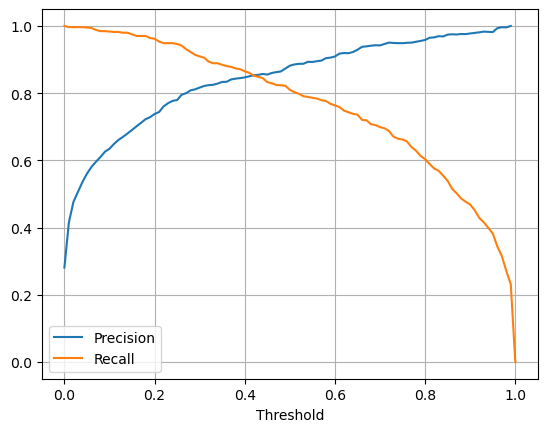

In [150]:
plt.plot(df_score.threshold, df_score.precision, label='Precision')
plt.plot(df_score.threshold, df_score.recall, label='Recall')
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)

In [172]:
df_score['diff'] = np.abs((df_score.precision - df_score.recall))

In [173]:
df_score.sort_values('diff', ascending=True)

,threshold,precision,recall,diff
42,0.42,0.852871,0.851852,0.001019
43,0.43,0.854392,0.848268,0.006125
41,0.41,0.850059,0.860215,0.010156
44,0.44,0.856970,0.844683,0.012286
40,0.40,0.846784,0.864994,0.018210
...,...,...,...,...
97,0.97,0.996226,0.315412,0.680814
0,0.00,0.280967,1.000000,0.719033
98,0.98,0.995614,0.271207,0.724407
99,0.99,1.000000,0.230585,0.769415


In [183]:
# # plt.figure(figsize=(5, 5))
# plt.plot(df_score.recall, df_score.precision)
# plt.ylabel("Precision")
# plt.xlabel("Recall")
# plt.title("PR-Curve")
# plt.grid(True)

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.12
- **0.32** - closest to 0.26
- 0.52
- 0.72


In [93]:
f_score = 2*(precision*recall)/(precision+recall)

In [94]:
df_score['f_score'] = 2*(df_score.precision*df_score.recall)/(df_score.precision+df_score.recall)

In [97]:
df_score.sort_values('f_score', ascending=False)

,threshold,precision,recall,f_score
26,0.26,0.795156,0.941458,0.862144
28,0.28,0.808377,0.922342,0.861607
31,0.31,0.821235,0.905615,0.861364
30,0.30,0.816524,0.909200,0.860373
27,0.27,0.799795,0.930705,0.860298
...,...,...,...,...
97,0.97,0.996226,0.315412,0.479129
0,0.00,0.280967,1.000000,0.438679
98,0.98,0.995614,0.271207,0.426291
99,0.99,1.000000,0.230585,0.374757


### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

- **0.003**
- 0.030
- 0.090
- 0.140


In [99]:
from sklearn.model_selection import KFold

In [101]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [103]:
kf.split(df_full_train)

<generator object _BaseKFold.split at 0x7fbcb83c2d60>

In [105]:
next(kf.split(df_full_train)) # returns index for training and val splits

(array([   0,    1,    2, ..., 9528, 9529, 9530]),
 array([   6,    7,   21, ..., 9520, 9525, 9527]))

In [107]:
train_idx, val_idx = next(kf.split(df_full_train))

In [108]:
len(train_idx), len(val_idx), len(df_full_train)

(7624, 1907, 9531)

In [119]:
k = 1
scores = []
for train_idx, val_idx in kf.split(df_full_train): 
    train = df_full_train.iloc[train_idx]
    val = df_full_train.iloc[val_idx]
    y_train = y_full_train[train_idx]
    y_val = y_full_train[val_idx]

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    dv = DictVectorizer(sparse=False)

    t_dicts = train.to_dict(orient='records')
    X_train = dv.fit_transform(t_dicts)

    model.fit(X_train, y_train)

    v_dicts = val.to_dict(orient='records')
    X_val = dv.transform(v_dicts)
    y_pred = model.predict(X_val)

    score = roc_auc_score(y_val, y_pred)
    print(f"Fold: {k} AUC: {score}")
    scores.append(score)
    
    k = k+1

Fold: 1 AUC: 0.9177639358688776
Fold: 2 AUC: 0.9107553217223028
Fold: 3 AUC: 0.9037463052813565
Fold: 4 AUC: 0.9079011209636941
Fold: 5 AUC: 0.9228257853257853


In [138]:
np.std(scores)

0.0075974892412010425

### Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.01, 0.1, 0.5, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.01
- 0.1
- 0.5
- **10**

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.


In [132]:
from tqdm.auto import tqdm

In [133]:
C_values = [0.01, 0.1, 0.5, 10]

In [137]:
n_splits = 5

final_score = []
for C in C_values:
    k = 1
    scores = []
    print(f"\nFor C={C},")
    for train_idx, val_idx in tqdm(kf.split(df_full_train), total=5): 
        train = df_full_train.iloc[train_idx]
        val = df_full_train.iloc[val_idx]
        y_train = y_full_train[train_idx]
        y_val = y_full_train[val_idx]

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        dv = DictVectorizer(sparse=False)

        t_dicts = train.to_dict(orient='records')
        X_train = dv.fit_transform(t_dicts)

        model.fit(X_train, y_train)

        v_dicts = val.to_dict(orient='records')
        X_val = dv.transform(v_dicts)
        y_pred = model.predict(X_val)

        score = roc_auc_score(y_val, y_pred)
        print(f"Fold: {k} AUC: {score}")
        scores.append(score)

        k = k+1
        
    final_score.append((C, np.mean(scores), np.std(scores)))


For C=0.01,


  0%|          | 0/5 [00:00<?, ?it/s]

Fold: 1 AUC: 0.8490381706679867
Fold: 2 AUC: 0.8378922571139552
Fold: 3 AUC: 0.8434261892811332
Fold: 4 AUC: 0.842897774803413
Fold: 5 AUC: 0.8432567432567433

For C=0.1,


  0%|          | 0/5 [00:00<?, ?it/s]

Fold: 1 AUC: 0.8896632566069906
Fold: 2 AUC: 0.8783549390860712
Fold: 3 AUC: 0.8959943672968603
Fold: 4 AUC: 0.8838966036473147
Fold: 5 AUC: 0.889171939171939

For C=0.5,


  0%|          | 0/5 [00:00<?, ?it/s]

Fold: 1 AUC: 0.9136588015290268
Fold: 2 AUC: 0.9008609315213089
Fold: 3 AUC: 0.9238455747030283
Fold: 4 AUC: 0.8990700462885506
Fold: 5 AUC: 0.9022713397713399

For C=10,


  0%|          | 0/5 [00:00<?, ?it/s]

Fold: 1 AUC: 0.9353944944036521
Fold: 2 AUC: 0.9207294278048995
Fold: 3 AUC: 0.9314580893424795
Fold: 4 AUC: 0.9140455077798226
Fold: 5 AUC: 0.9266719391719391


In [139]:
df_final_score  = pd.DataFrame(final_score, columns=['C', 'score_mean', 'score_std'])

In [140]:
df_final_score.sort_values('score_mean', ascending=False)

,C,score_mean,score_std
3,10.00,0.925660,0.007597
2,0.50,0.907941,0.009451
1,0.10,0.887416,0.005937
0,0.01,0.843302,0.003531


## Submit the results

- Submit your results here: https://forms.gle/E7Fa3WuBw3HkPQYg6
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is October 9 (Monday), 23:00 CET. After that the form will be closed.
